# CSC 177 Data Preprocessing Project


In [3]:
# Imports
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from graphviz import Digraph

In [ ]:
# Import data
data = pd.read_csv("north.csv")
print(f"Number of instances = {data.shape[0]}")
print(f"Number of attributes = {data.shape[1]}")
data.head()

Number of instances = 8392320
Number of attributes = 27


,index,Data,Hora,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),...,"VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",region,state,station,station_code,latitude,longitude,height
0,0,2000-05-09,00:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,...,-9999,-9999.0,-9999.0,N,AM,MANAUS,A101,-3.103333,-60.016389,61.25
1,1,2000-05-09,01:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,...,-9999,-9999.0,-9999.0,N,AM,MANAUS,A101,-3.103333,-60.016389,61.25
2,2,2000-05-09,02:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,...,-9999,-9999.0,-9999.0,N,AM,MANAUS,A101,-3.103333,-60.016389,61.25
3,3,2000-05-09,03:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,...,-9999,-9999.0,-9999.0,N,AM,MANAUS,A101,-3.103333,-60.016389,61.25
4,4,2000-05-09,04:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,...,-9999,-9999.0,-9999.0,N,AM,MANAUS,A101,-3.103333,-60.016389,61.25


### Translate the column names

This is done first in order to make preprocessing easier (by knowing what the columns mean).


In [ ]:
print(f"Before translating names: \n{list(data.columns[1:5])}",)
data.columns = ['index', 'Date', 'Time', 'TOTAL RAINFALL, TIME (mm)',
               'ATMOSPHERIC PRESSURE AT THE SEASON LEVEL, HOURLY (mB)',
               'MAX ATMOSPHERIC PRESSURE AT THE PREVIOUS TIME. (AUT) (mB)',
               'MIN. ATMOSPHERIC PRESSURE. AT THE PREVIOUS TIME. (AUT) (mB)',
               'GLOBAL RADIATION (Kj/m²)',
               'AIR TEMPERATURE - DRY BULB, TIME (°C)',
               'DEW POINT TEMPERATURE (°C)',
               'MAXIMUM TEMPERATURE AT THE PREVIOUS TIME. (AUT) (°C)',
               'MINIMUM TEMPERATURE AT THE PREVIOUS TIME. (AUT) (°C)',
               'TEMPERATURE DEW MAX. AT THE PREVIOUS TIME. (AUT) (°C)',
               'DEW TEMPERATURE MIN. AT THE PREVIOUS TIME. (AUT) (°C)',
               'REL. HUMIDITY MAX. AT THE PREVIOUS TIME. (AUT) (%)',
               'REL. HUMIDITY MIN. AT THE PREVIOUS TIME. (AUT) (%)',
               'AIR RELATIVE HUMIDITY, HOURLY (%)',
               'WIND, TIMED DIRECTION (gr) (° (gr))', 'WIND, MAXIMUM gust (m/s)',
               'WIND, HOURLY SPEED (m/s)', 'region', 'state', 'station',
               'station_code', 'latitude', 'longitude', 'height'
               ]
print(f"After: \n{list(data.columns[1:5])}")
data.head()

Before translating names: 
['Data', 'Hora', 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)', 'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)']
After: 
['Date', 'Time', 'TOTAL RAINFALL, TIME (mm)', 'ATMOSPHERIC PRESSURE AT THE SEASON LEVEL, HOURLY (mB)']


,index,Date,Time,"TOTAL RAINFALL, TIME (mm)","ATMOSPHERIC PRESSURE AT THE SEASON LEVEL, HOURLY (mB)",MAX ATMOSPHERIC PRESSURE AT THE PREVIOUS TIME. (AUT) (mB),MIN. ATMOSPHERIC PRESSURE. AT THE PREVIOUS TIME. (AUT) (mB),GLOBAL RADIATION (Kj/m²),"AIR TEMPERATURE - DRY BULB, TIME (°C)",DEW POINT TEMPERATURE (°C),...,"WIND, TIMED DIRECTION (gr) (° (gr))","WIND, MAXIMUM gust (m/s)","WIND, HOURLY SPEED (m/s)",region,state,station,station_code,latitude,longitude,height
0,0,2000-05-09,00:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,...,-9999,-9999.0,-9999.0,N,AM,MANAUS,A101,-3.103333,-60.016389,61.25
1,1,2000-05-09,01:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,...,-9999,-9999.0,-9999.0,N,AM,MANAUS,A101,-3.103333,-60.016389,61.25
2,2,2000-05-09,02:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,...,-9999,-9999.0,-9999.0,N,AM,MANAUS,A101,-3.103333,-60.016389,61.25
3,3,2000-05-09,03:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,...,-9999,-9999.0,-9999.0,N,AM,MANAUS,A101,-3.103333,-60.016389,61.25
4,4,2000-05-09,04:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,...,-9999,-9999.0,-9999.0,N,AM,MANAUS,A101,-3.103333,-60.016389,61.25


### Dropping Fields

Then, drop fields that are of no value for our purpose.


In [ ]:
print(f"Before drop (first five): \n{list(data.columns[:5])}")
data.drop(["index",
           "Time", 
           "station",
           "station_code",
           "latitude",
           "longitude",
           "MAX ATMOSPHERIC PRESSURE AT THE PREVIOUS TIME. (AUT) (mB)",
           "MIN. ATMOSPHERIC PRESSURE. AT THE PREVIOUS TIME. (AUT) (mB)",
           "GLOBAL RADIATION (Kj/m²)",
           "AIR TEMPERATURE - DRY BULB, TIME (°C)",
           "MINIMUM TEMPERATURE AT THE PREVIOUS TIME. (AUT) (°C)",
           "MAXIMUM TEMPERATURE AT THE PREVIOUS TIME. (AUT) (°C)",
           "ATMOSPHERIC PRESSURE AT THE SEASON LEVEL, HOURLY (mB)",
           "TEMPERATURE DEW MAX. AT THE PREVIOUS TIME. (AUT) (°C)",
           "DEW TEMPERATURE MIN. AT THE PREVIOUS TIME. (AUT) (°C)",
           "REL. HUMIDITY MAX. AT THE PREVIOUS TIME. (AUT) (%)",
           "REL. HUMIDITY MIN. AT THE PREVIOUS TIME. (AUT) (%)",
           "AIR RELATIVE HUMIDITY, HOURLY (%)",
           "region",
          ], axis=1, inplace=True)
print(f"After drop: \n{list(data.columns)}")
data.head()

Before drop (first five): 
['index', 'Date', 'Time', 'TOTAL RAINFALL, TIME (mm)', 'ATMOSPHERIC PRESSURE AT THE SEASON LEVEL, HOURLY (mB)']
After drop: 
['Date', 'TOTAL RAINFALL, TIME (mm)', 'DEW POINT TEMPERATURE (°C)', 'WIND, TIMED DIRECTION (gr) (° (gr))', 'WIND, MAXIMUM gust (m/s)', 'WIND, HOURLY SPEED (m/s)', 'state', 'height']


,Date,"TOTAL RAINFALL, TIME (mm)",DEW POINT TEMPERATURE (°C),"WIND, TIMED DIRECTION (gr) (° (gr))","WIND, MAXIMUM gust (m/s)","WIND, HOURLY SPEED (m/s)",state,height
0,2000-05-09,-9999.0,-9999.0,-9999,-9999.0,-9999.0,AM,61.25
1,2000-05-09,-9999.0,-9999.0,-9999,-9999.0,-9999.0,AM,61.25
2,2000-05-09,-9999.0,-9999.0,-9999,-9999.0,-9999.0,AM,61.25
3,2000-05-09,-9999.0,-9999.0,-9999,-9999.0,-9999.0,AM,61.25
4,2000-05-09,-9999.0,-9999.0,-9999,-9999.0,-9999.0,AM,61.25


### Data Quality

A large number of values in the dataset are set to -9999. Make sure those are removed first before doing any other preprocessing.


In [ ]:
print(f"Number of rows that before -9999: {data.shape[0]}")
data = data[(data["TOTAL RAINFALL, TIME (mm)"] != -9999.0)]
data = data[(data["DEW POINT TEMPERATURE (°C)"] != -9999.0)]
data = data[(data["WIND, TIMED DIRECTION (gr) (° (gr))"] != -9999.0)]
data = data[(data["WIND, MAXIMUM gust (m/s)"] != -9999.0)]
data = data[(data["WIND, HOURLY SPEED (m/s)"] != -9999.0)]
data = data[(data["height"] != -9999.0)]
print(f"Number of rows that after removing -9999: {data.shape[0]}")

Number of rows that before -9999: 8392320
Number of rows that after removing -9999: 5903974


### Sampling

This dataset is much bigger than what is needed for our purposes. Let's shrink this down early so we can improve speed.


In [ ]:
print(f"Number of rows before sampling: {data.shape[0]}")
data = data.sample(frac=0.01, random_state=1)
print(f"Number of rows after sampling: {data.shape[0]}")

Number of rows before sampling: 5903974
Number of rows after sampling: 59040


### Delete Duplicate Values

Next, delete duplicate values to avoid processing false data.


In [ ]:
dupes = data.duplicated()
print(f"Number of duplicate rows = {dupes.sum()}")

Number of duplicate rows = 0


We don't actually have duplicate rows for our case, since there is a unique date field in each row. This is the following result if we set the first 500 rows to be duplicated


In [ ]:
dupes = data.copy()
print(f"Number of rows before discarding duplicates = {dupes.shape[0]}")
dupes.iloc[:500] = dupes.iloc[-1]
dupes = dupes.drop_duplicates()
print(f"Number of rows after discarding duplicates = {dupes.shape[0]}")

Number of rows before discarding duplicates = 59040
Number of rows after discarding duplicates = 58540


### Replace Missing Values

Do this now so we are not messing around with missing data, possibly getting false results. In our case, we have no missing values, so we are good here.


In [ ]:
data = data.replace('?',np.NaN)

print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))

print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d' % (col,data[col].isna().sum()))

Number of instances = 59040
Number of attributes = 8
Number of missing values:
	Date: 0
	TOTAL RAINFALL, TIME (mm): 0
	DEW POINT TEMPERATURE (°C): 0
	WIND, TIMED DIRECTION (gr) (° (gr)): 0
	WIND, MAXIMUM gust (m/s): 0
	WIND, HOURLY SPEED (m/s): 0
	state: 0
	height: 0


Since we don't have any missing values, let's see what it would be like if we did.


In [ ]:
missing_data = data["DEW POINT TEMPERATURE (°C)"].iloc[:10]

# Insert "missing" data
missing_data[2], missing_data[4] = "?", "?"        
missing_data = missing_data.replace("?", np.NaN)
print(f"Before missing data: \n\n{missing_data}\n")

missing_data = missing_data.fillna(missing_data.median())

print(f"After replacing missing values: \n\n{missing_data}")

Before missing data: 

7019044    23.5
1922446    22.8
5081799    17.8
5653236    22.9
633624     22.1
3752018    21.3
499902     22.8
1904786    23.8
5467555    22.7
1888731    20.3
2           NaN
4           NaN
Name: DEW POINT TEMPERATURE (°C), dtype: float64

After replacing missing values: 

7019044    23.50
1922446    22.80
5081799    17.80
5653236    22.90
633624     22.10
3752018    21.30
499902     22.80
1904786    23.80
5467555    22.70
1888731    20.30
2          22.75
4          22.75
Name: DEW POINT TEMPERATURE (°C), dtype: float64


### Outliers

Now that we're done cleaning up the messy data, let's move on to removing outliers, since those may alter our results in a negative manner.


<AxesSubplot: >

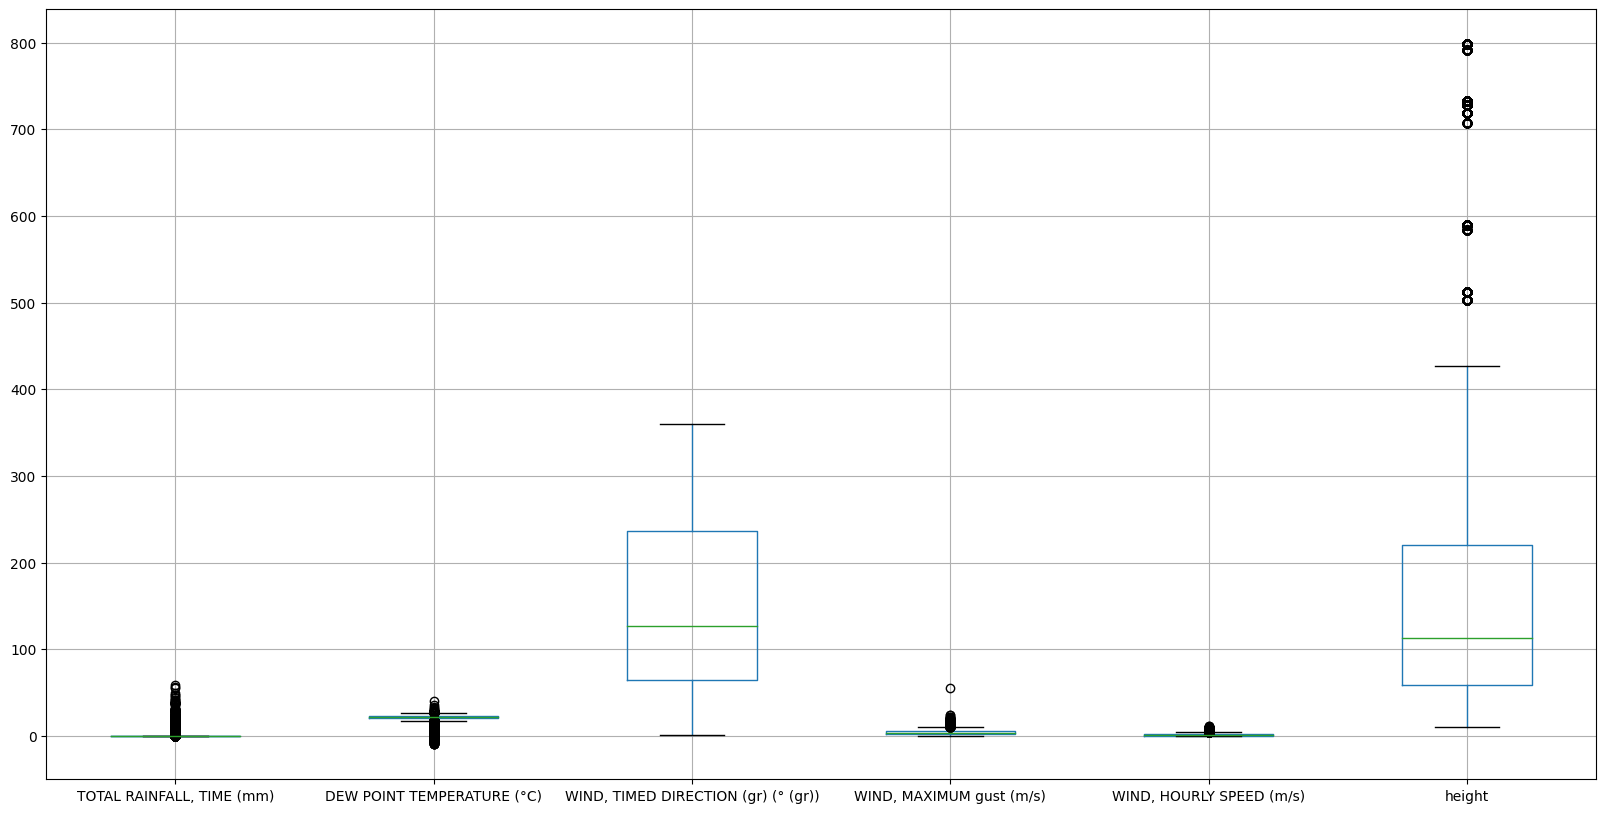

In [ ]:
%matplotlib inline

data.boxplot(figsize=(20, 10))

There are outliers in the first, second, fourth, fifth and sixth fields, but we'll ignore those in `TOTAL RAINFALL, TIME (mm)` since a majority of those are caused by a rainfall time of 0 (which is normal)


In [ ]:
print(f"Number of rows before discarding outliers: {data.shape[0]}")
# Remove outliers that have a zscore > 3 or < -3
data = data[(np.abs(stats.zscore(data["DEW POINT TEMPERATURE (°C)"])) < 3)]
data = data[(np.abs(stats.zscore(data["WIND, MAXIMUM gust (m/s)"])) < 3)]
data = data[(np.abs(stats.zscore(data["WIND, HOURLY SPEED (m/s)"])) < 3)]
data = data[(np.abs(stats.zscore(data["height"])) < 3)]

print(f"Number of rows before discarding outliers: {data.shape[0]}")

Number of rows before discarding outliers: 59040
Number of rows before discarding outliers: 54878


### Discretization

We can get a better idea of the data by using discretization. This is one of the last steps since we've filtered out most of the bad data.


<AxesSubplot: >

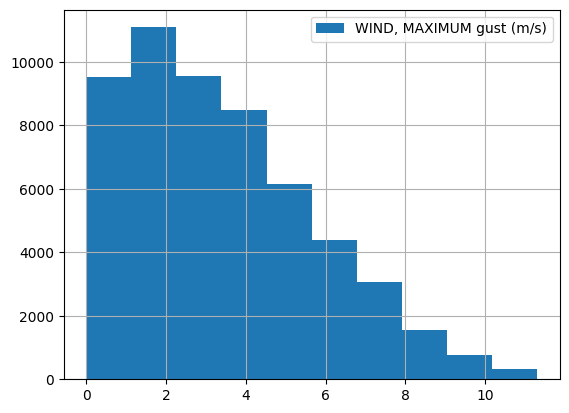

In [ ]:
data["WIND, MAXIMUM gust (m/s)"].hist(legend=True) # defaults to 10 bins

Also using methods such as `cut()` and `qcut()` help us to see the frequency of the data.


In [ ]:
bins = pd.cut(data["WIND, MAXIMUM gust (m/s)"],4)
bins.value_counts(sort=False)

(-0.0113, 2.825]    26053
(2.825, 5.65]       18756
(5.65, 8.475]        8265
(8.475, 11.3]        1804
Name: WIND, MAXIMUM gust (m/s), dtype: int64

In [ ]:
bins = pd.qcut(data["WIND, MAXIMUM gust (m/s)"],4)
bins.value_counts(sort=False)

(-0.001, 1.6]    14660
(1.6, 3.0]       13162
(3.0, 5.0]       13889
(5.0, 11.3]      13167
Name: WIND, MAXIMUM gust (m/s), dtype: int64

### Principal Component Analysis

This can be done the same time as discretization. Let's see if the attributes of wind and dew point temperature have a correlation in two different states (Amazonas and Pará).


In [ ]:
features = ["WIND, MAXIMUM gust (m/s)", "DEW POINT TEMPERATURE (°C)"]
x = data.loc[:, features].values
y = data.loc[:,['state']].values
x = StandardScaler().fit_transform(x)

In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2'])
principalDf.head()

,pc1,pc2
0,-1.199591,0.161653
1,0.041197,-0.669172
2,1.061433,1.238898
3,-0.047275,-0.639266
4,-0.671250,0.453238


In [ ]:
pca_data = pd.concat([principalDf, data["state"]], axis = 1)

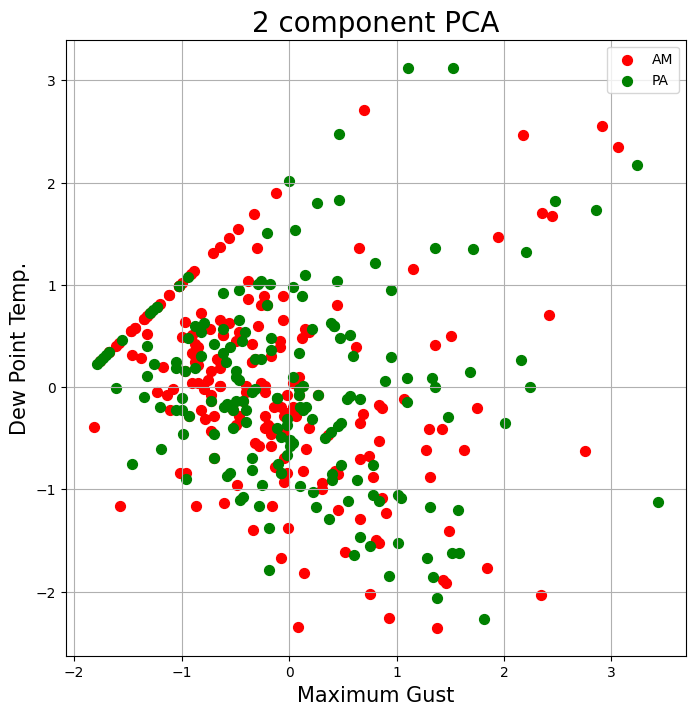

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Maximum Gust', fontsize = 15)
ax.set_ylabel('Dew Point Temp.', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['AM', 'PA']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = pca_data['state'] == target
    ax.scatter(pca_data.loc[indicesToKeep, 'pc1']
               , pca_data.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### Aggregation

This can be done the same time as the two before to help visualize the data.


Text(0.5, 1.0, 'Monthly Rainfall (variance = 2552.6301)')

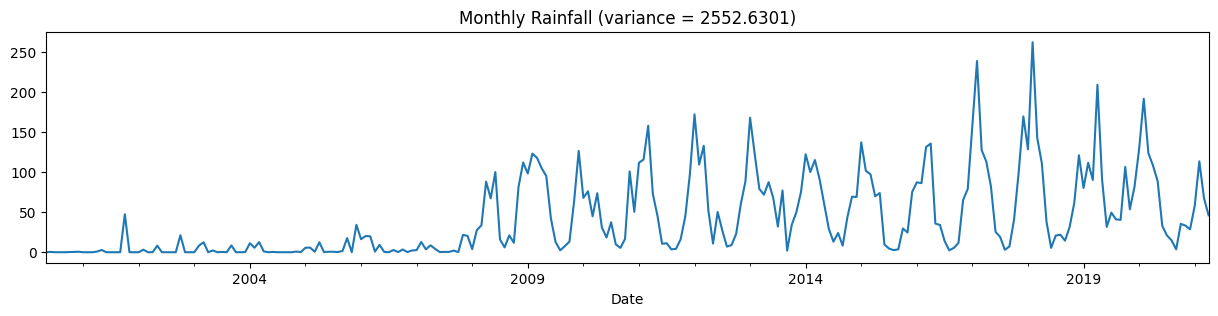

In [ ]:
daily = data.copy()
daily.index = pd.to_datetime(daily['Date'])
daily = daily['TOTAL RAINFALL, TIME (mm)']
monthly = daily.groupby(pd.Grouper(freq='M')).sum()
ax = monthly.plot(kind='line',figsize=(15,3))
ax.set_title('Monthly Rainfall (variance = %.4f)' % (monthly.var()))

In [ ]:
training_data = data.sample(frac=0.8, random_state=25)
testing_data = data.drop(training_data.index)
print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

training_mean = training_data.mean(numeric_only=True)
testing_mean = testing_data.mean(numeric_only=True)

training_sd = training_data.std(numeric_only=True)
testing_sd = testing_data.std(numeric_only=True)

print(f"\nMean of Training Data")
print(training_mean)
print(f"\nMean of Testing Data")
print(testing_mean)
print(f"\nStandard Deviation of Training Data")
print(training_sd)
print(f"\nStandard Deviation of Testing Data")
print(testing_sd)

No. of training examples: 43902
No. of testing examples: 10976

Mean of Training Data
TOTAL RAINFALL, TIME (mm)                0.194734
DEW POINT TEMPERATURE (°C)              21.726561
WIND, TIMED DIRECTION (gr) (° (gr))    153.205139
WIND, MAXIMUM gust (m/s)                 3.400421
WIND, HOURLY SPEED (m/s)                 1.164967
height                                 137.702090
dtype: float64

Mean of Testing Data
TOTAL RAINFALL, TIME (mm)                0.202515
DEW POINT TEMPERATURE (°C)              21.732507
WIND, TIMED DIRECTION (gr) (° (gr))    154.513848
WIND, MAXIMUM gust (m/s)                 3.397458
WIND, HOURLY SPEED (m/s)                 1.162017
height                                 137.304439
dtype: float64

Standard Deviation of Training Data
TOTAL RAINFALL, TIME (mm)                1.560335
DEW POINT TEMPERATURE (°C)               2.414853
WIND, TIMED DIRECTION (gr) (° (gr))    104.020333
WIND, MAXIMUM gust (m/s)                 2.388501
WIND, HOURLY SPEED (m/s) 

In [ ]:
final_df = data.copy()

# Linear Regression Project & Classification Tree Homework


## a.)


Text(0, 0.5, 'TOTAL RAINFALL, TIME (mm)')

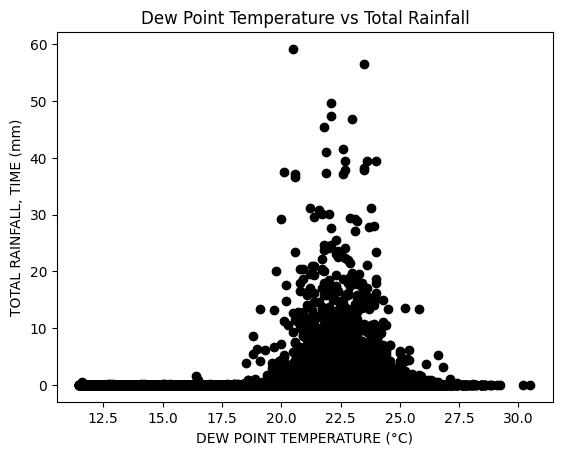

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt



X = training_data.loc[:,"DEW POINT TEMPERATURE (°C)"]
y = training_data.loc[:,"TOTAL RAINFALL, TIME (mm)"]
X_test = testing_data.loc[:,"DEW POINT TEMPERATURE (°C)"]
y_test = testing_data.loc[:,"TOTAL RAINFALL, TIME (mm)"]
plt.scatter(X, y,  color='black')
plt.title('Dew Point Temperature vs Total Rainfall')
plt.xlabel('DEW POINT TEMPERATURE (°C)')
plt.ylabel('TOTAL RAINFALL, TIME (mm)')



In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression()

# Fit regression model to the training set
regr.fit(X.values.reshape(-1, 1), y)

LinearRegression()

In [ ]:
# Apply model to the test set
y_pred_test = regr.predict(X_test.values.reshape(-1,1))

Root mean squared error = 1.4177
R-squared = 0.0015


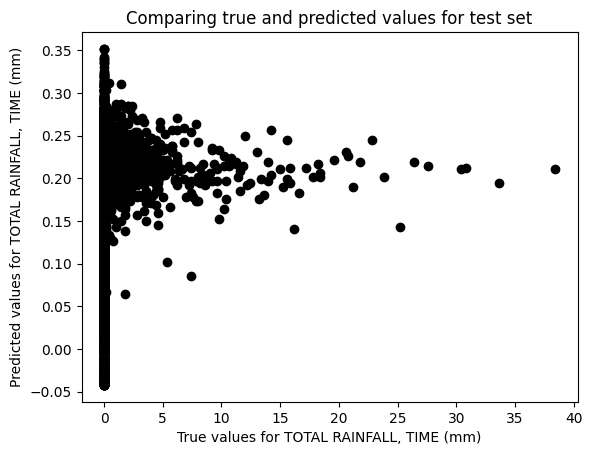

In [ ]:
# Comparing true versus predicted values
plt.scatter(y_test, y_pred_test, color='black')
plt.title('Comparing true and predicted values for test set')
plt.xlabel('True values for TOTAL RAINFALL, TIME (mm)')
plt.ylabel('Predicted values for TOTAL RAINFALL, TIME (mm)')

# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('R-squared = %.4f' % r2_score(y_test, y_pred_test))

Slope =  [0.02315158]
Intercept =  -0.3082705308553598


Text(0, 0.5, 'TOTAL RAINFALL, TIME (mm)')

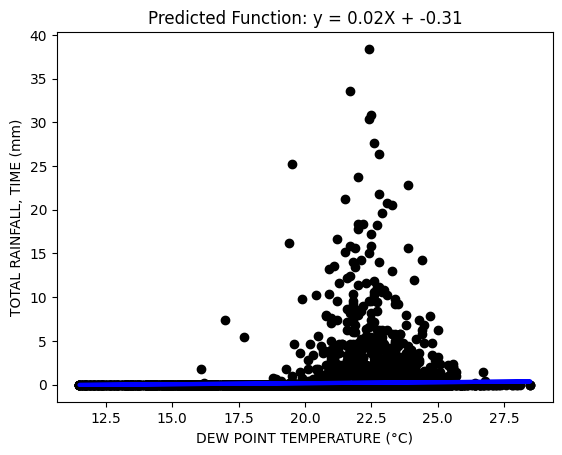

In [ ]:
# Display model parameters
print('Slope = ', regr.coef_)
print('Intercept = ', regr.intercept_)### Step 4: Postprocessing

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred_test, color='blue', linewidth=3)
titlestr = 'Predicted Function: y = %.2fX + %.2f' % (regr.coef_, regr.intercept_)
plt.title(titlestr)
plt.xlabel('DEW POINT TEMPERATURE (°C)')
plt.ylabel('TOTAL RAINFALL, TIME (mm)')

## b.)


### Regression.)

#### Report:

I chose to see if there is a correlation between GRE Score and Chance of Admit. I made a training and testing data sample, trained the regression model with the training data, then checked the regression line against the testing data.

From the graphs, all variables have a positive correlation for the higher the variable value, the higher the chance of admission. However, university rating, SOP, and LOR scores have a pretty low correlation upon inspection. You can see that each value of these variables have a pretty high range of chance of admit.

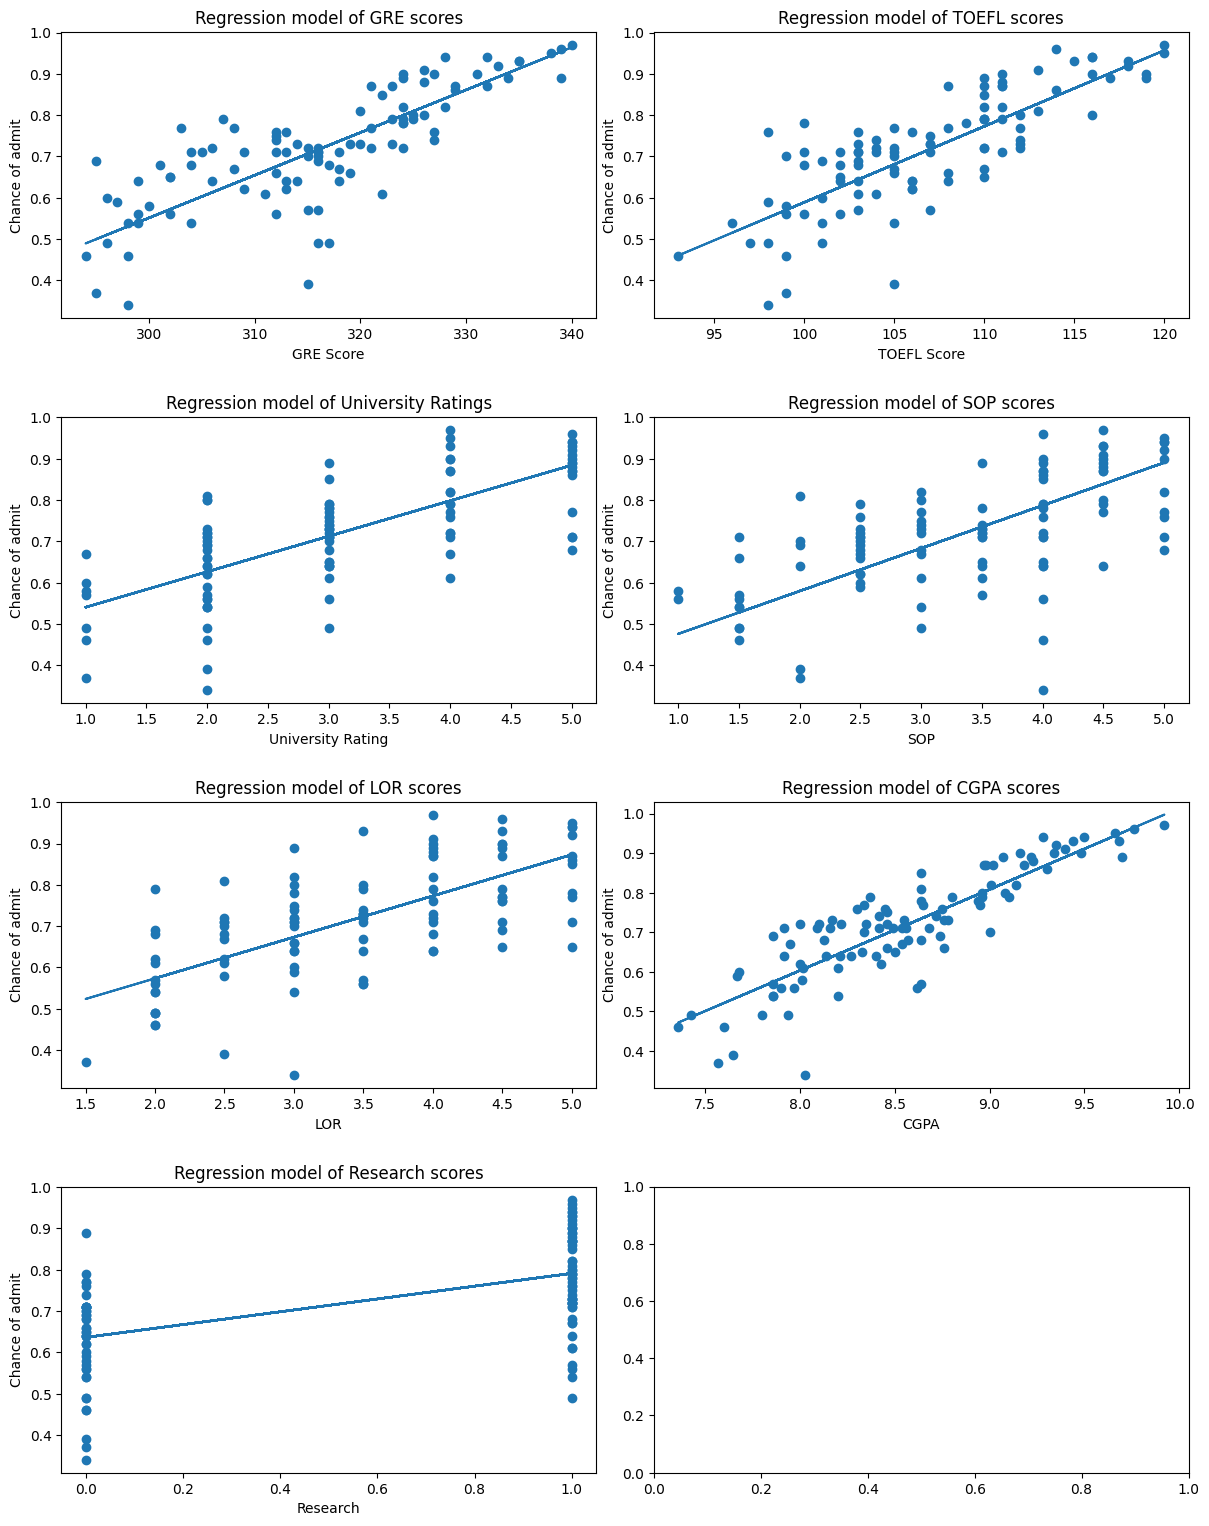

In [ ]:
from sklearn import linear_model
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

data_b = pd.read_csv("hw2-dataset-b.csv")
training_data_b = data_b.sample(frac=0.8, random_state=25)
training_data_b_gre = training_data_b[['GRE Score']]
training_data_b_toefl = training_data_b[['TOEFL Score']]
training_data_b_university_rating = training_data_b[['University Rating']]
training_data_b_sop = training_data_b[['SOP']]
training_data_b_lor = training_data_b[['LOR']]
training_data_b_cgpa = training_data_b[['CGPA']]
training_data_b_research = training_data_b[['Research']]
training_data_b_y = training_data_b[['Chance of Admit']]

testing_data_b = data_b.drop(training_data_b.index)
testing_data_b_gre = testing_data_b[['GRE Score']]
testing_data_b_toefl = testing_data_b[['TOEFL Score']]
testing_data_b_university_rating = testing_data_b[['University Rating']]
testing_data_b_sop = testing_data_b[['SOP']]
testing_data_b_lor = testing_data_b[['LOR']]
testing_data_b_cgpa = testing_data_b[['CGPA']]
testing_data_b_research = testing_data_b[['Research']]
testing_data_b_y = testing_data_b[['Chance of Admit']]

# Create linear regression objects
regr_gre = linear_model.LinearRegression()
regr_toefl = linear_model.LinearRegression()
regr_university_rating = linear_model.LinearRegression()
regr_sop = linear_model.LinearRegression()
regr_lor = linear_model.LinearRegression()
regr_cgpa = linear_model.LinearRegression()
regr_research = linear_model.LinearRegression()
regr_research.fit(training_data_b_research, training_data_b_y)
######################

# Fit regression models to the training set
regr_gre.fit(training_data_b_gre, training_data_b_y)
regr_toefl.fit(training_data_b_toefl, training_data_b_y)
regr_university_rating.fit(training_data_b_university_rating, training_data_b_y)
regr_sop.fit(training_data_b_sop, training_data_b_y)
regr_lor.fit(training_data_b_lor, training_data_b_y)
regr_cgpa.fit(training_data_b_cgpa, training_data_b_y)
regr_research.fit(training_data_b_research, training_data_b_y)
######################

# Predict based on the regression models
predict_gre = regr_gre.predict(testing_data_b_gre)
predict_toefl = regr_toefl.predict(testing_data_b_toefl)
predict_university_rating = regr_university_rating.predict(testing_data_b_university_rating)
predict_sop = regr_sop.predict(testing_data_b_sop)
predict_lor = regr_lor.predict(testing_data_b_lor)
predict_cgpa = regr_cgpa.predict(testing_data_b_cgpa)
predict_research = regr_research.predict(testing_data_b_research)
######################

# Plot the regression model line to their respective variable
fig, ((ax1, ax2),(ax3,ax4), (ax5, ax6), (ax7,ax8)) = plt.subplots(4, 2, figsize=(12,15))
fig.tight_layout(h_pad=5)
ax1.set_title("Regression model of GRE scores")
ax1.set_xlabel("GRE Score")
ax1.set_ylabel("Chance of admit")
ax1.scatter(testing_data_b_gre, testing_data_b_y)
ax1.plot(testing_data_b_gre, predict_gre)

ax2.set_title("Regression model of TOEFL scores")
ax2.set_xlabel("TOEFL Score")
ax2.set_ylabel("Chance of admit")
ax2.scatter(testing_data_b_toefl, testing_data_b_y)
ax2.plot(testing_data_b_toefl, predict_toefl)

ax3.set_title("Regression model of University Ratings")
ax3.set_xlabel("University Rating")
ax3.set_ylabel("Chance of admit")
ax3.scatter(testing_data_b_university_rating, testing_data_b_y)
ax3.plot(testing_data_b_university_rating, predict_university_rating)

ax4.set_title("Regression model of SOP scores")
ax4.set_xlabel("SOP")
ax4.set_ylabel("Chance of admit")
ax4.scatter(testing_data_b_sop, testing_data_b_y)
ax4.plot(testing_data_b_sop, predict_sop)

ax5.set_title("Regression model of LOR scores")
ax5.set_xlabel("LOR")
ax5.set_ylabel("Chance of admit")
ax5.scatter(testing_data_b_lor, testing_data_b_y)
ax5.plot(testing_data_b_lor, predict_lor)

ax6.set_title("Regression model of CGPA scores")
ax6.set_xlabel("CGPA")
ax6.set_ylabel("Chance of admit")
ax6.scatter(testing_data_b_cgpa, testing_data_b_y)
ax6.plot(testing_data_b_cgpa, predict_cgpa)

ax7.set_title("Regression model of Research scores")
ax7.set_xlabel("Research")
ax7.set_ylabel("Chance of admit")
ax7.scatter(testing_data_b_research, testing_data_b_y)
ax7.plot(testing_data_b_research, predict_research)


### Classification.)

#### Report:

Using test data and the results from testing classifer accuracy, we could conclude that the classifer is accurate as the results we received for F1 score, accuracy, precision score, as well as recall score all were 1.00. We could see that the classifier was able to accurately predict the admission chance based on the the test data given. 


##### Valuable Rules

Rule 1: If University Rating is 4 above and CGPA is above 9.5, predict high admission chance. 

Rule 2: IF Research is 0 and SOP is below 3, predict low admission chance.

Rule 3: If SOP is below 4 and CGPA is above 8, predict medium admission chance.

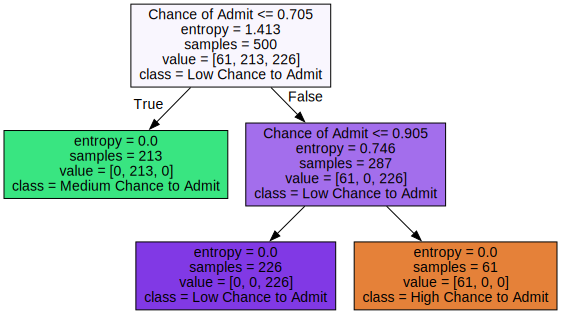

In [6]:
import pandas as pd
from sklearn import tree
from sklearn.metrics import accuracy_score, f1_score, precision_score,recall_score,classification_report
import graphviz as gv

#Discretizing into 3 bins
data = pd.read_csv('hw2-dataset-b.csv')
data['Class'] = pd.cut(data['Chance of Admit'], bins=[0, .7, .9, 1], labels=['Low Admission Chance', 'Medium Admission Chance', 'High Admission Chance'])

#Applying decision tree classifier
Y = data["Class"]
X = data.drop(["Class", "Serial No."], axis=1)

clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(X, Y)

#Plotting decision tree
dot_data = tree.export_graphviz(
    clf,
    feature_names=X.columns,
    class_names=[
        "High Chance to Admit",
        "Medium Chance to Admit",
        "Low Chance to Admit",
    ],
    filled=True,
    out_file=None,
)
graph = gv.Source(dot_data)
graph

In [12]:
#Applying decision tree to classify examples
testData = [
    [501, 345, 119, 5, 4, 4, 10, 1, 0.97, "High Admission Chance"],
    [502, 301, 115, 3, 3, 5, 9, 1, 0.77, "Medium Admission Chance"],
    [503, 323, 108, 2, 2, 4.5, 7, 0, 0.59, "Low Admission Chance"],
    [504, 333, 122, 2, 2, 3, 9.5, 1, 0.76, "Medium Admission Chance"],
]
testData = pd.DataFrame(testData, columns=data.columns)
testData


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Class
0,501,345,119,5,4,4.0,10.0,1,0.97,High Admission Chance
1,502,301,115,3,3,5.0,9.0,1,0.77,Medium Admission Chance
2,503,323,108,2,2,4.5,7.0,0,0.59,Low Admission Chance
3,504,333,122,2,2,3.0,9.5,1,0.76,Medium Admission Chance


In [8]:
testY = pd.DataFrame(testData, columns=["Class"])
testX = testData.drop(["Serial No.", "Class"], axis=1)

predY = clf.predict(testX)
predictions = pd.concat([testData['Serial No.'],pd.Series(predY,name='Predicted Class')], axis=1)
predictions

,Serial No.,Predicted Class
0,501,High Admission Chance
1,502,Medium Admission Chance
2,503,Low Admission Chance
3,504,Medium Admission Chance


In [9]:
#Calculating accuracy of classifer on test data

print('Accuracy on test data is %.2f' % (accuracy_score(testY, predY)))
print('F1 score on test data is %.2f' % (f1_score(testY, predY, average='micro')))
print('Precision Score on test data is %.2f' % (precision_score(testY, predY, average='micro')))
print('Recall score on test data is %.2f' % (recall_score(testY, predY, average='micro')))
print( classification_report(testY,predY))

Accuracy on test data is 1.00
F1 score on test data is 1.00
Precision Score on test data is 1.00
Recall score on test data is 1.00
                         precision    recall  f1-score   support

  High Admission Chance       1.00      1.00      1.00         1
   Low Admission Chance       1.00      1.00      1.00         1
Medium Admission Chance       1.00      1.00      1.00         2

               accuracy                           1.00         4
              macro avg       1.00      1.00      1.00         4
           weighted avg       1.00      1.00      1.00         4



## c.)


### (i)


In [ ]:
id3_df = pd.DataFrame({"color": ["red", "blue", "red", "green", "red", "green"],
                      "shape": ["square", "square", "round", "square", "round", "round"],
                      "size": ["big", "big", "small", "small", "big", "big"],
                      "class": ["+", "+", "-", "-", "+", "-"]}
                      )
id3_df.index = np.arange(1, len(id3_df) + 1)
id3_df

,color,shape,size,class
1,red,square,big,+
2,blue,square,big,+
3,red,round,small,-
4,green,square,small,-
5,red,round,big,+
6,green,round,big,-


$$ Entropy(t) = -\sum_{j}p(j|t)\log_{2}p(j|t) $$

1. Calculating Initial Entropy
Out of 6 instances, 3 are + and 3 are - 
$$ P(+) = -(\frac{3}{6})*\log_{2}(\frac{3}{6}) = 0.5 $$
$$ P(-) = -(\frac{3}{6})*\log_{2}(\frac{3}{6}) = 0.5 $$
$$ Entropy(t) = E(t) = 0.5 + 0.5 + 1

2. For every feature we will calculate entropy and information gain

For attribute color
$$ E(color = red) = -\frac{2}{3}*\log_{2}\frac{2}{3}-\frac{1}{3}*\log_{2}\frac{1}{3} \approx 0.92 $$
$$ E(color = blue) = -\frac{1}{1}*\log_{2}\frac{1}{1}-0 = 0 $$
$$ E(color = green) = -0-\frac{2}{2}*\log_{2}\frac{2}{2} = 0 $$

Average Entropy = $ \frac{3}{6}(0.92) + \frac{1}{6}(0) + \frac{2}{6}(0) = 0.46 $

Gain(Outlook) = 1 - 0.46 = 0.54

For attribute shape

$$ E(shape = square) = -\frac{2}{3}*\log_{2}\frac{2}{3} - \frac{1}{3}*\log_{2}\frac{1}{3} \approx 0.92 $$
$$ E(shape = round) = -\frac{1}{3}*\log_{2}\frac{1}{3}-\frac{2}{3} * \log_{2}\frac{2}{3} = 0.92 $$

Average Entropy = $ \frac{3}{6}(0.92) + \frac{3}{6}(0.92) = 0.92 $

Gain(Outlook) = 1 - 0.92 = 0.08

For attribute size

$$ E(size = big) = -\frac{3}{4}*\log_{2}\frac{3}{4}-\frac{1}{4}*\log_{2}\frac{1}{4} \approx 0.81 $$
$$ E(size = small) = 0 - \frac{2}{2}*\log_{2}\frac{2}{2} = 0 $$

Average Entropy = $ \frac{4}{6}(0.81) + \frac{2}{6}(0) = 0.54 $

Gain(Outlook) = 1 - 0.54 = 0.46

Since the feature "color" has the highest information gain, it provides more information, and therefore will be the first splitting attribute.

Therefore, we need to then draw a decision tree based on each respective color (red, green, blue) and its attributes (size and shape).

### Entropy of Each Attribute

Color of Red vs. Shape

In [ ]:
red_shape_df = pd.DataFrame({"Total": [1, 2], "+": [1, 1], "-": [0, 1], "Entropy": [0, 1]})
red_shape_df.index = "Square", "Round"
red_shape_df = red_shape_df.rename_axis("Shape")
red_shape_df

,Total,+,-,Entropy
Shape,,,,
Square,1,1,0,0
Round,2,1,1,1



$$ E(color = red, shape = square) = -\frac{1}{1}\log_{2}\frac{1}{1} - 0 = 0 $$
$$ E(color = red, shape = round) = -\frac{1}{2}\log_{2}\frac{1}{2} - \frac{1}{2}\log_{2}\frac{1}{2} = 1 $$

Average Entropy = $ \frac{1}{3}(0) + \frac{2}{3}(1) = 0.66 $

Initial Entropy $ = 0.92 $

$ Gain = 0.92 - 0.66 = 0.26 $


Color of Red vs. Size

In [ ]:
red_size_df = pd.DataFrame({"Total": [2, 1], "+": [2, 0], "-": [0, 1], "Entropy": [0, 0]})
red_size_df.index = "Big", "Small"
red_size_df = red_size_df.rename_axis("Size")
red_size_df

,Total,+,-,Entropy
Size,,,,
Big,2,2,0,0
Small,1,0,1,0



$$ E(color = red, size = big) = -\frac{2}{2}\log_{2}\frac{2}{2} - 0 = 0 $$
$$ E(color = red, size = small) = 0 - \frac{1}{1}\log_{2}\frac{1}{1} = 0 $$

Average Entropy = $ \frac{1}{3}(0) + \frac{2}{3}(1) = 0.66 $

Initial Entropy $ = 0.92 $ 

$ Gain = 0.92 - 0 = 0.92 $


Similarly, since the size attribute has a higher information gain, size will be chosen as the second splitting attribute for our tree.

Also, since we discovered early on that the Entropy for both colors of blue and green are 0, we do not need to calculate the gain values of these both. 



### The decision tree is created as follows

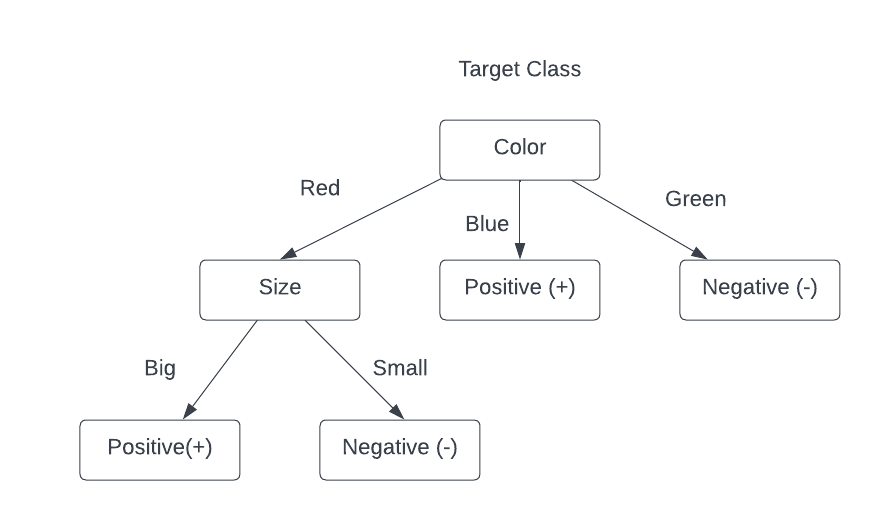

In [ ]:
from IPython.display import Image
Image("decision_tree.png")

Note that shape is not included in the decision tree. This is because shape has no effect on the result, since color and size alone can determine the target class.

The rules that we gather from this is:
- If color is blue, target class is positive
- If color is green, target class is negative
- If color is red and size is big, target class is positive
- If color is red and size is small, target class is negative

### (ii) 

### What impact may happen to your created tree, if you later add a new missing attribute after creating the tree? What are some of the different possible changes you may expect to see on the classification decision tree you just created?

Due to the rules established by the decision tree, any attributes that are included would not make any impact to the created tree, as long as the class column remains the same. For example, if we added an attribute "sleeve" that shows either "long" or "short." A shirt with the color red, size big, with sleeve long will always have class positive(+) due to being both red and big whereas a shirt with the same attributes but size small will always be negative(-). This would apply to the other colors as well. If we have a green shirt with long sleeves or short sleeves they would always be negative(-), while blue shirt will always be positive(+). This is true as long as the class column remains the same and is true for the other color attributes as well. Thus, adding an additional attribute will not change the decision tree as long as the class column is unchanged.

### What if a data scientist provided his or her results with high confidence, by missing this attribute altogether?

Since the new attribute will not change the class column there would be no change and the new attribute will not be determinitive of the outcome.

### What if his or her results are used for decision making on how many million more shirts to produce for the next year? Do you think the data scientist surprises and makes an impact on the manager and CEO in case he or she discovers the new attribute and it's influence in getting more reliable results valuable to the company?

If his or her results are used then the result will lead toward a greater production in big red and blue shirts for the next year. The impact would be on company resources and would be bigger the larger the amount of production. If the company were to produce many green shirts these will largely go to waste. Therefore, the company, based on these findings, can allocate more resources toward shirts that are more likely to sell. The tree, provided by the data scientist, allows the company to produce shirts that the public is more inclined to purchase.

